<a href="https://colab.research.google.com/github/PradnyaTayade/heart/blob/main/hd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heartDiseaseAndAges.png', 'heart.csv', 'sample_data']


In [115]:
data = pd.read_csv("heart.csv")

In [116]:
type(data)

pandas.core.frame.DataFrame

In [117]:
data.shape

(1025, 14)

In [118]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [119]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved during exercise.

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-4) The four main coronary arteries are the right coronary artery (RCA), left coronary artery (LCA), left anterior descending artery (LAD) and left circumflex artery.

13. thal: A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [120]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [122]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
976,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
722,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
905,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0


In [123]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [124]:
data.isnull().sum().sum()

0

###So, we have no missing values

In [125]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

1    526
0    499
Name: target, dtype: int64


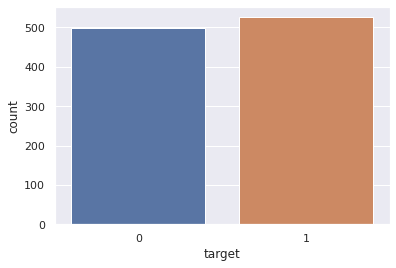

In [126]:
y = data["target"]

sns.countplot(y)

target_temp = data.target.value_counts()

print(target_temp)

# Percentage of patient with or without heart problems in the given dataset

In [127]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1025,2)))

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


In [128]:
data["sex"].unique()

array([1, 0])

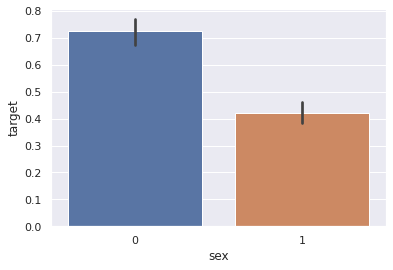

In [129]:
sns.barplot(data["sex"],y)

### Here 0 is female and 1 is male patients

In [130]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


# Heart Disease Frequency for ages

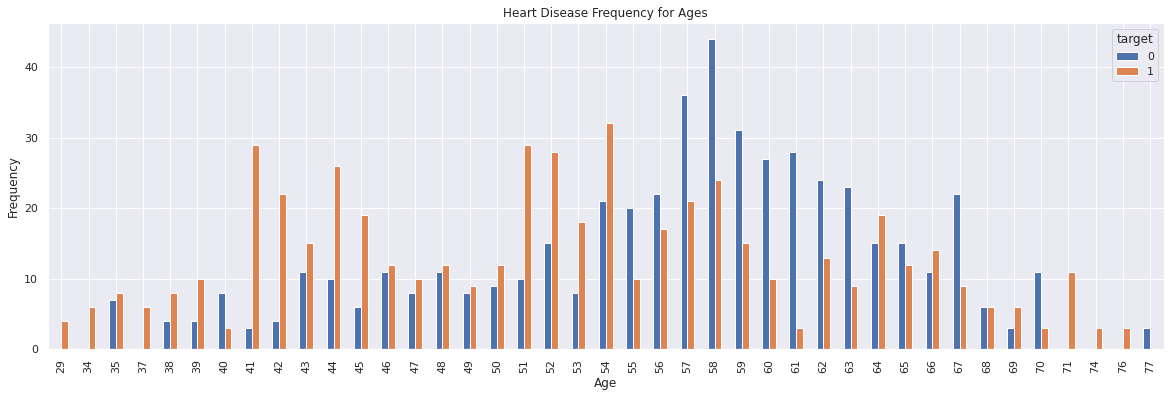

In [131]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

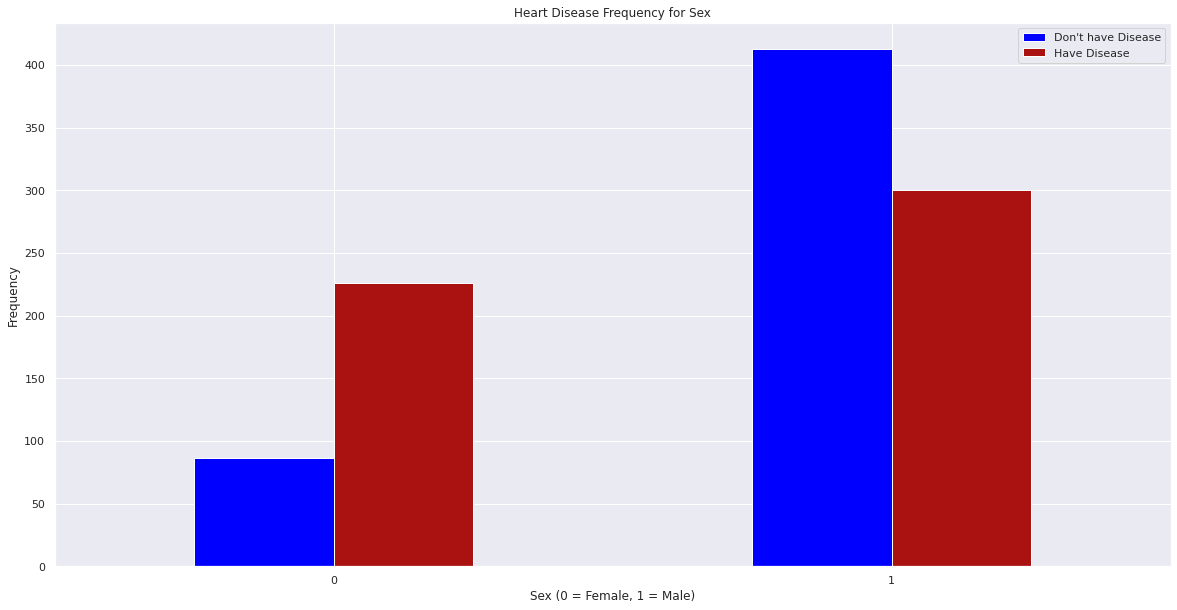

In [132]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [133]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Heart disease according to Fasting Blood sugar 

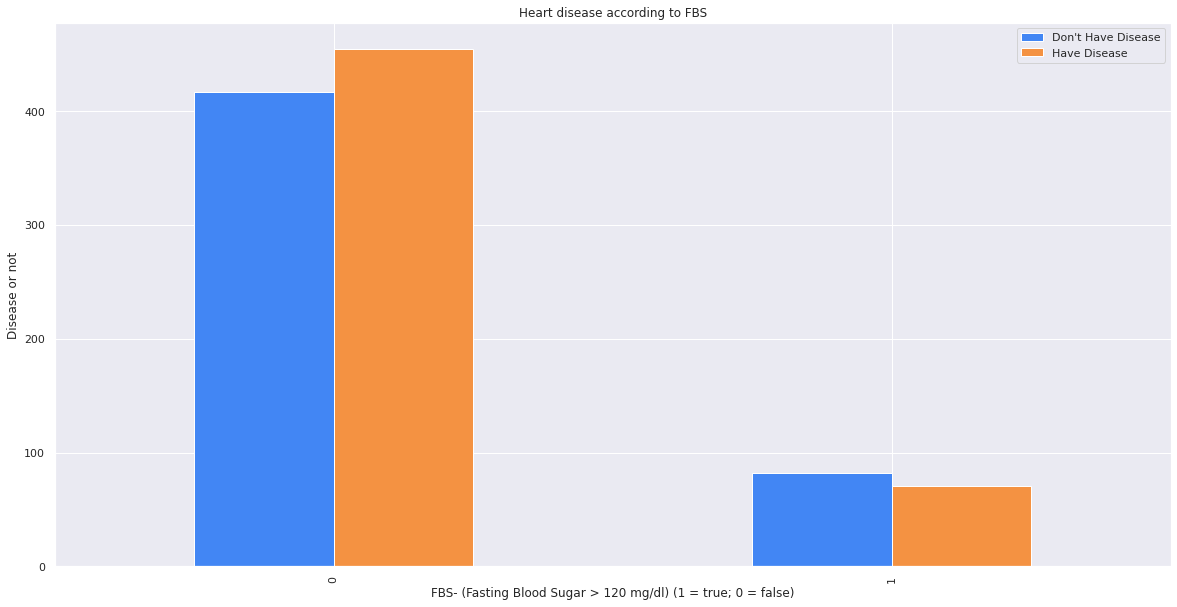

In [134]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic]

In [135]:
data["chest_pain_type"].unique()

array([0, 1, 2, 3])

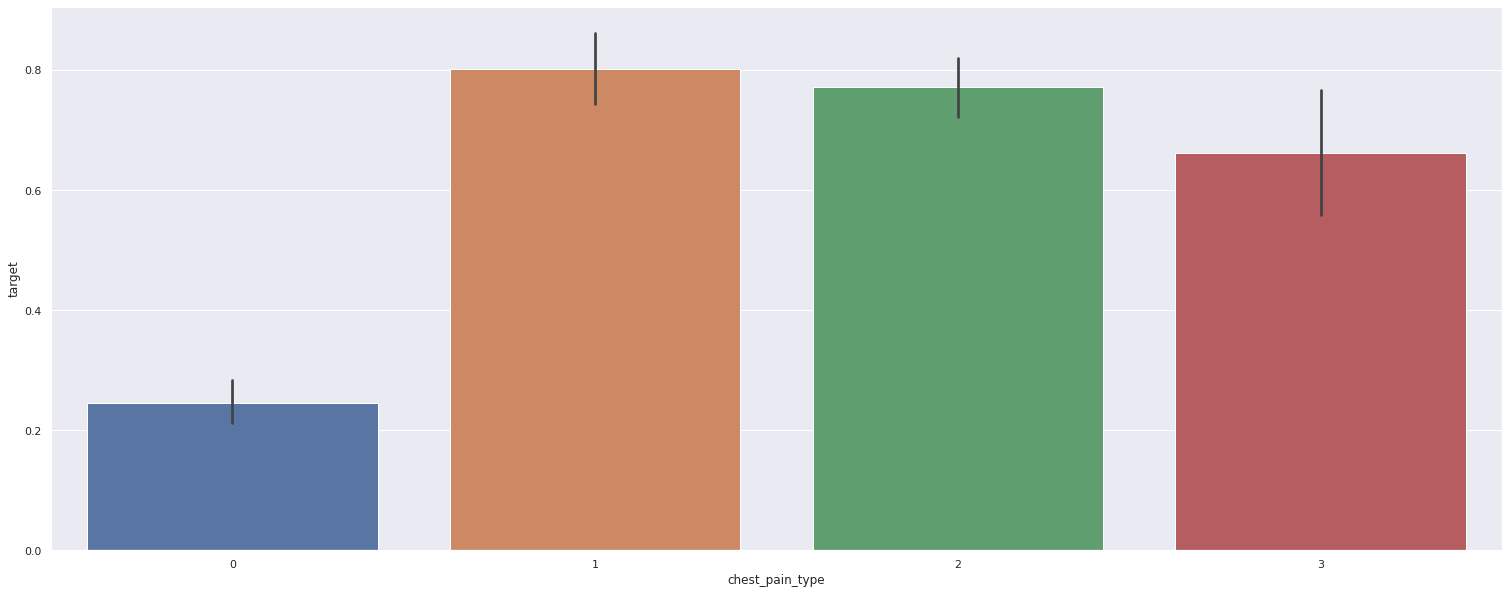

In [136]:
plt.figure(figsize=(26, 10))
sns.barplot(data["chest_pain_type"],y)

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [137]:
data["rest_ecg"].unique()

array([1, 0, 2])

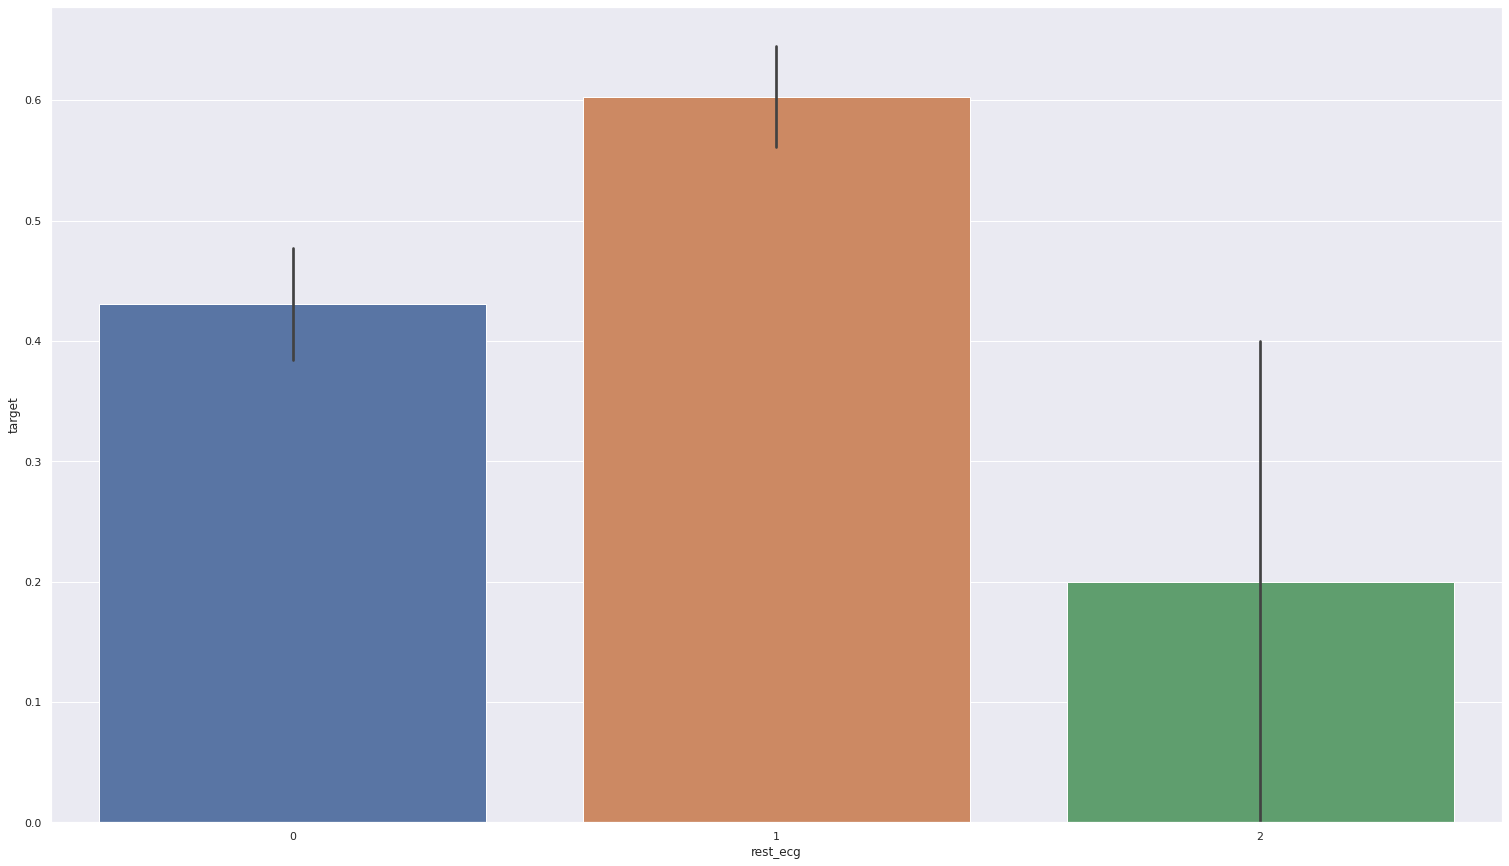

In [138]:
plt.figure(figsize=(26, 15))
sns.barplot(data["rest_ecg"],y)

## people with restecg '1' and '2' are much more likely to have a heart disease than with restecg '0'

#Analysing Exercise induced angina (1 = yes; 0 = no)

In [139]:
data["exercise_induced_angina"].unique()

array([0, 1])

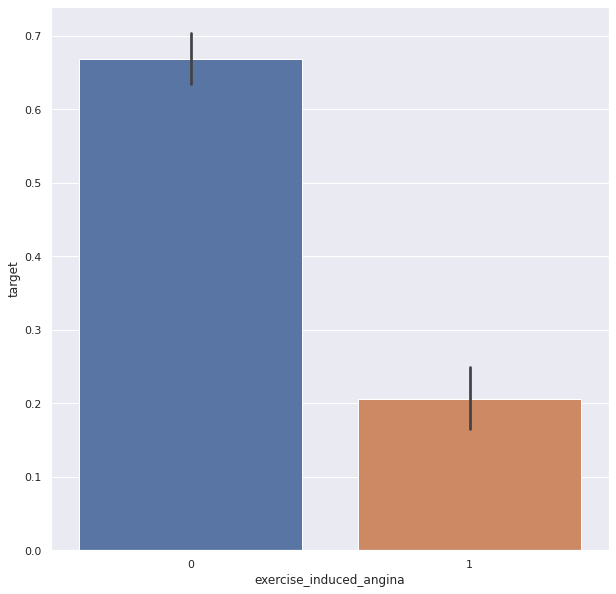

In [140]:
plt.figure(figsize=(10, 10))
sns.barplot(data["exercise_induced_angina"],y)

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [141]:
data["st_slope"].unique()

array([2, 0, 1])

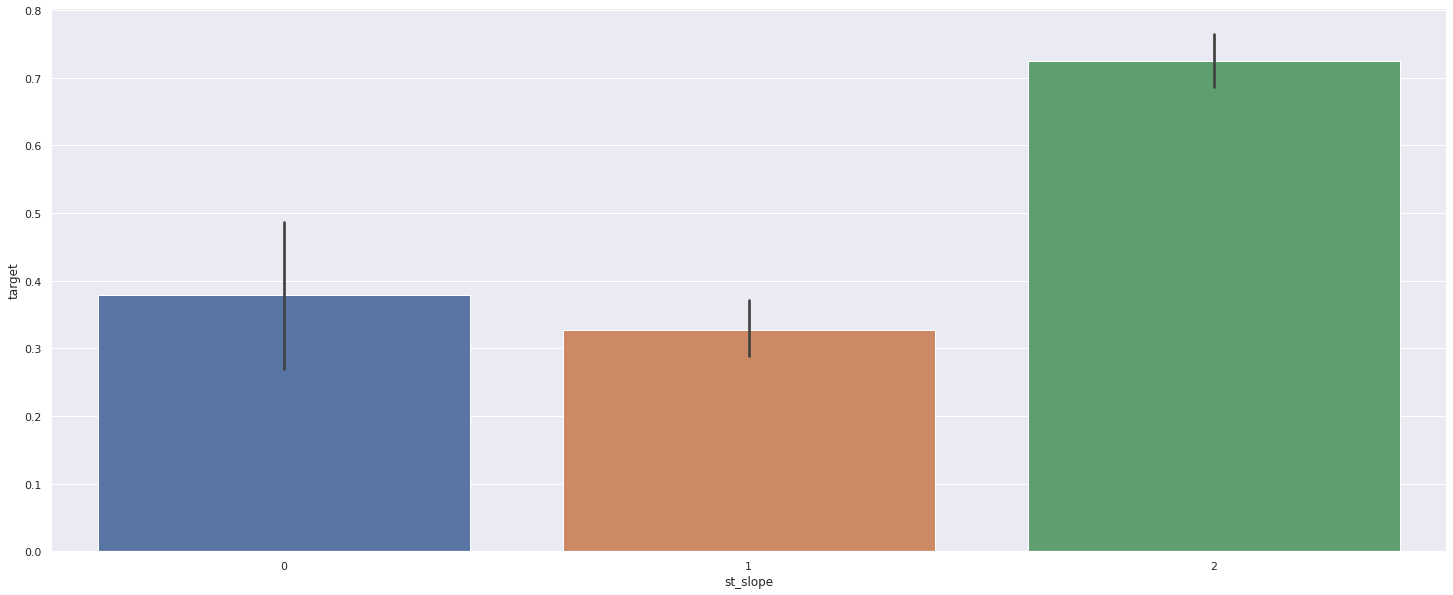

In [142]:
plt.figure(figsize=(25, 10))
sns.barplot(data["st_slope"],y)

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-4) colored by flourosopy

In [143]:
data["num_major_vessels"].unique()

array([2, 0, 1, 3, 4])

#Major blood vessesls connect to heart are aorta,superior venacava,inferior vencava,pulmonary artery, pulmonary veins.

### count num_major vessels

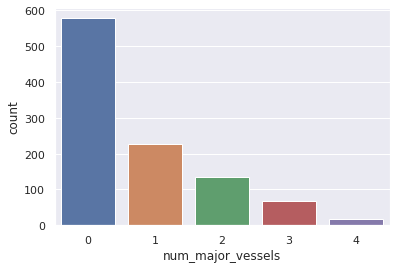

In [144]:
sns.countplot(data["num_major_vessels"])

# Splitting the dataset to Train and Test

In [145]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=1)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 820 records and Testing features have 205 records.


In [146]:
X_train.shape

(820, 13)

In [147]:
X_test.shape

(205, 13)

In [148]:
Y_train.shape

(820,)

In [149]:
Y_test.shape

(205,)

## importing Accuracy score

In [150]:
from sklearn.metrics import accuracy_score

# Logistic regression

In [151]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, Y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))

Training set score: 0.848
Test set score: 0.805


In [152]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

LogisticRegression()

#Threshold value

In [153]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

In [154]:
threshold = []
accuracy = []

for p in np.unique(lr.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (lr.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(Y_train,y_pred))

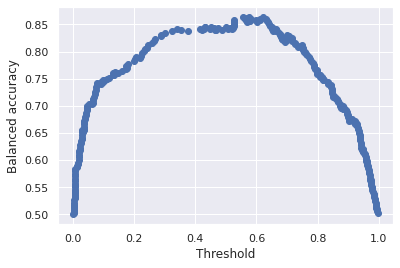

In [155]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [156]:
accuracy[np.argmax(accuracy)]

0.8640429338103757

In [157]:
threshold[np.argmax(accuracy)]

0.6203528024857727

In [158]:
Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape

(205,)

In [159]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.49 %


# Confusion Matrix

In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
matrix= confusion_matrix(Y_test, Y_pred_lr)

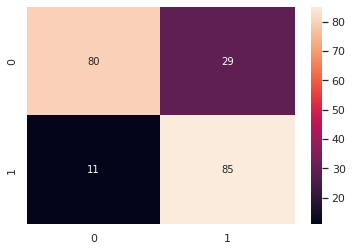

In [162]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [163]:
from sklearn.metrics import precision_score

In [164]:
precision = precision_score(Y_test, Y_pred_lr)

In [165]:
print("Precision: ",precision)

Precision:  0.7456140350877193


# Recall

In [166]:
from sklearn.metrics import recall_score

In [167]:
recall = recall_score(Y_test, Y_pred_lr)

In [168]:
print("Recall is: ",recall)

Recall is:  0.8854166666666666




---



# Random Forest

In [169]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [170]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

100.0
0


In [171]:
Y_pred_rf.shape

(205,)

In [172]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest is: 100.0 %


## confusion matrix of Random Forest

In [173]:
from sklearn.metrics import confusion_matrix

In [174]:
matrix= confusion_matrix(Y_test, Y_pred_rf)

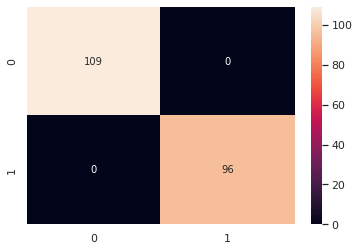

In [175]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [176]:
from sklearn.metrics import precision_score

In [177]:
precision = precision_score(Y_test, Y_pred_rf)

In [178]:
print("Precision: ",precision)

Precision:  1.0


# recall

In [179]:
from sklearn.metrics import recall_score

In [180]:
recall = recall_score(Y_test, Y_pred_rf)

In [181]:
print("Recall is: ",recall)

Recall is:  1.0


# Naive Bayes

In [182]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)
Y_train_nb=nb.predict(X_train)

Y_pred_nb = nb.predict(X_test)

In [183]:
Y_pred_nb.shape

(205,)

In [184]:
score_1 = round(accuracy_score(Y_train_nb,Y_train)*100,2)

print("The accuracy score achieved using Naive Bayes on training  is: "+str(score_1)+" %")

The accuracy score achieved using Naive Bayes on training  is: 84.27 %


In [185]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 78.05 %


## confusion matrix of Naive Bayes

In [186]:
from sklearn.metrics import confusion_matrix

In [187]:
matrix= confusion_matrix(Y_test, Y_pred_nb)

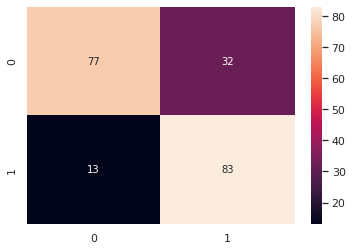

In [188]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [189]:
from sklearn.metrics import precision_score

In [190]:
precision = precision_score(Y_test, Y_pred_nb)

In [191]:
print("Precision: ",precision)

Precision:  0.7217391304347827


# recall

In [192]:
from sklearn.metrics import recall_score

In [193]:
recall = recall_score(Y_test, Y_pred_nb)

In [194]:
print("Recall is: ",recall)

Recall is:  0.8645833333333334


# KNN(K Nearest Neighbors)

In [195]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
Y_train_knn=knn.predict(X_train)
Y_pred_knn=knn.predict(X_test)

In [196]:
Y_pred_knn.shape

(205,)

In [197]:
score_knn = round(accuracy_score(Y_train_knn,Y_train)*100,2)

print("The accuracy score achieved using KNN on training  is: "+str(score_knn)+" %")

The accuracy score achieved using KNN on training  is: 77.32 %


In [198]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 71.22 %


## Confusion matrix

In [199]:
from sklearn.metrics import confusion_matrix

In [200]:
matrix= confusion_matrix(Y_test, Y_pred_knn)

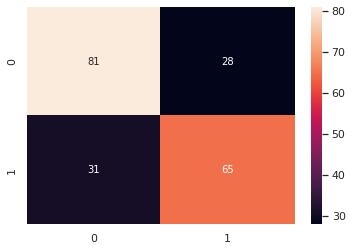

In [201]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [202]:
from sklearn.metrics import precision_score

In [203]:
precision = precision_score(Y_test, Y_pred_knn)

In [204]:
print("Precision: ",precision)

Precision:  0.6989247311827957


# recall

In [205]:
from sklearn.metrics import recall_score

In [206]:
recall = recall_score(Y_test, Y_pred_knn)

In [207]:
print("Recall is: ",recall)

Recall is:  0.6770833333333334


# Decision Tree

In [208]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [209]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.849
Accuracy on test set: 0.834


In [210]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

100.0
0


In [211]:
print(Y_pred_dt.shape)

(205,)


### accuracy

In [212]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


## Confusion Matrix

In [213]:
from sklearn.metrics import confusion_matrix

In [214]:
matrix= confusion_matrix(Y_test, Y_pred_dt)

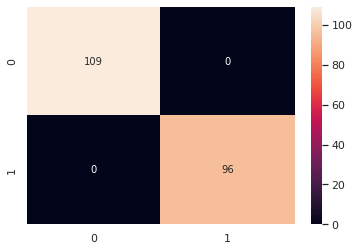

In [215]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [216]:
from sklearn.metrics import precision_score

In [217]:
precision = precision_score(Y_test, Y_pred_dt)

In [218]:
print("Precision: ",precision)

Precision:  1.0


# recall

In [219]:
from sklearn.metrics import recall_score

In [220]:
recall = recall_score(Y_test, Y_pred_dt)

In [221]:
print("Recall is: ",recall)

Recall is:  1.0


# FINAL SCORE

In [222]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 80.49 %
The accuracy score achieved using Naive Bayes is: 78.05 %
The accuracy score achieved using K-Nearest Neighbors is: 71.22 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %


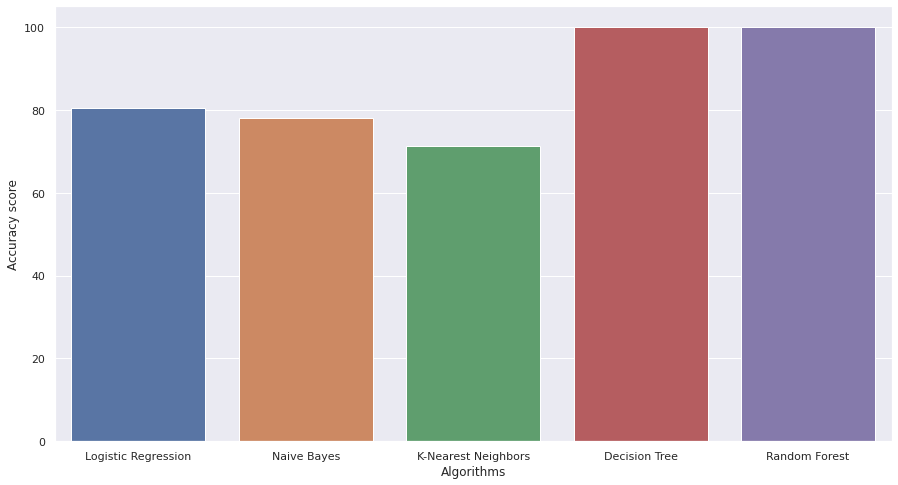

In [223]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [224]:
input_data = (59,	1,	1,	140,	221,	0	,1	,164,	1	,0.0,	2,	0,	2)

#change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The person does not have a Heart Disease')
else:
    print('The person has a Heart Disease')

[1]
The person has a Heart Disease
